Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a random kernel of size (3,3) using torch.nn.functional.conv2d.What is the dimension of the output image?

In [26]:
import torch
import torch.nn.functional as F
image = torch.rand(6,6)
print("image=", image)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)
kernel = torch.ones(3,3)
print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage)

image= tensor([[0.3878, 0.1921, 0.4146, 0.4223, 0.0605, 0.7167],
        [0.4007, 0.3666, 0.3949, 0.4807, 0.3558, 0.5593],
        [0.0704, 0.2581, 0.4765, 0.9652, 0.6075, 0.4699],
        [0.3011, 0.9825, 0.2069, 0.1885, 0.3266, 0.5100],
        [0.3213, 0.7971, 0.2004, 0.6795, 0.0694, 0.4432],
        [0.6669, 0.8958, 0.9921, 0.2392, 0.9951, 0.6475]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
image= tensor([[[[0.3878, 0.1921, 0.4146, 0.4223, 0.0605, 0.7167],
          [0.4007, 0.3666, 0.3949, 0.4807, 0.3558, 0.5593],
          [0.0704, 0.2581, 0.4765, 0.9652, 0.6075, 0.4699],
          [0.3011, 0.9825, 0.2069, 0.1885, 0.3266, 0.5100],
          [0.3213, 0.7971, 0.2004, 0.6795, 0.0694, 0.4432],
          [0.6669, 0.8958, 0.9921, 0.2392, 0.9951, 0.6475]]]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage= tensor([[[[2.9617, 3.9710, 4.1781, 4.6381],
          [3.4577, 4.3199, 4.0026, 4.4635],
          [3.6142, 4.7546, 3

Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D to get the same output. You may ignore bias.

In [27]:
import torch
import torch.nn.functional as F

image = torch.rand(6, 6)
print("Input image:\n", image)
image = image.unsqueeze(dim=0).unsqueeze(dim=0)
print("Input image shape:", image.shape)

conv_layer = torch.nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)

out_image_conv2d = conv_layer(image)
print("Output image using torch.nn.Conv2d:\n", out_image_conv2d)

kernel = torch.ones(3, 3)

kernel = kernel.unsqueeze(dim=0).unsqueeze(dim=0)

out_image_conv2d_functional = F.conv2d(image, kernel, stride=1, padding=0)
print("Output image using torch.nn.functional.conv2d:\n", out_image_conv2d_functional)

print("Outputs are equal:", torch.allclose(out_image_conv2d, out_image_conv2d_functional))


Input image:
 tensor([[0.1160, 0.4092, 0.6430, 0.9307, 0.2976, 0.6821],
        [0.2688, 0.6244, 0.5928, 0.3856, 0.8057, 0.0492],
        [0.2444, 0.8191, 0.3348, 0.4925, 0.6970, 0.9726],
        [0.3681, 0.4476, 0.7102, 0.8350, 0.2419, 0.6291],
        [0.0305, 0.7721, 0.0202, 0.2907, 0.1097, 0.9246],
        [0.2033, 0.4756, 0.0811, 0.8289, 0.0995, 0.6194]])
Input image shape: torch.Size([1, 1, 6, 6])
Output image using torch.nn.Conv2d:
 tensor([[[[ 0.3100,  0.1617,  0.4530,  0.0358],
          [ 0.2602,  0.2092,  0.2812,  0.5752],
          [ 0.5466,  0.4150,  0.2856,  0.1059],
          [ 0.2414,  0.0207,  0.3948,  0.2317]],

         [[-0.4779, -0.6338, -0.6533, -0.4985],
          [-0.4468, -0.5800, -0.6721, -0.7377],
          [-0.5830, -0.8751, -0.6299, -0.5840],
          [-0.4601, -0.5056, -0.4611, -0.7299]],

         [[ 0.2823,  0.3529,  0.7076,  0.4363],
          [ 0.3773,  0.6264,  0.4059,  0.7639],
          [ 0.3598,  0.4860,  0.0270,  0.4931],
          [ 0.0729,  0.5

3. Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the classification accuracy in the form of a Confusion matrix. Verify the number of learnable parameters in the model.

In [1]:
import torch
import torchvision
from torch import nn
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt 

In [2]:
train_data = datasets.MNIST(root="./content",download=True,train=True,transform=ToTensor(),target_transform=None)
test_data = datasets.MNIST(root="./content",download=True,train=False,transform=ToTensor())
train_loader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=32)

In [3]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [4]:
train_features_batch,train_labels_batch = next(iter(train_loader))

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device 

'cuda'

In [6]:
class CNNclf(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=3),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )

        self.clf = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64,20,bias=True),
            nn.ReLU(),
            nn.Linear(20,10,bias=True)
        )

    def forward(self,x):
        x = self.net(x)
        x = self.clf(x)
        return x
    
torch.manual_seed(42)
model = CNNclf().to(device)
model

CNNclf(
  (net): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=3, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (clf): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=64, out_features=20, bias=True)
    (2): ReLU()
    (3): Linear(in_features=20, out_features=10, bias=True)
  )
)

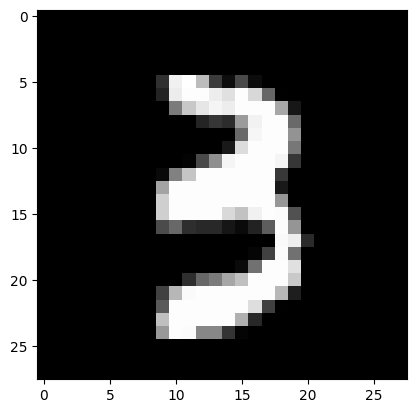

In [7]:
torch.manual_seed(42)
rand_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[rand_idx],train_labels_batch[rand_idx]
plt.imshow(img.squeeze(),cmap='gray')


In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)

In [9]:
def accuracy_fn(y,y_pred):
    correct = torch.eq(y,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [10]:
def train_step(model,device,optimizer,accuracy_fn,loss_fn,data_loader):
    train_loss,train_acc = 0,0
    model.to(device)
    for batch,(X,y) in enumerate(data_loader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f}|Train accuracy: {train_acc:.5f}")

def test_step(model,device,optimizer,accuracy_fn,loss_fn,data_loader):
    test_loss,test_acc = 0,0
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device),y.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred,y)
            test_acc += accuracy_fn(y,y_pred.argmax(dim=1))
        test_acc /= len(data_loader)
        test_loss /= len(data_loader)
    print(f"Train loss: {test_loss:.5f}|Train accuracy: {test_acc:.5f}")

In [11]:
torch.manual_seed(42)
epochs = 3 
for epoch in range(epochs):
    print(f"Epoch: {epoch}------")
    train_step(model,device,optimizer,accuracy_fn,loss_fn,train_loader)
    test_step(model,device,optimizer,accuracy_fn,loss_fn,test_loader)

Epoch: 0------
Train loss: 0.24413|Train accuracy: 92.19500
Train loss: 0.11918|Train accuracy: 96.20607
Epoch: 1------
Train loss: 0.07183|Train accuracy: 97.76000
Train loss: 0.06798|Train accuracy: 97.70367
Epoch: 2------
Train loss: 0.05131|Train accuracy: 98.44333
Train loss: 0.04685|Train accuracy: 98.54233


In [12]:
def make_predictions(model,data,device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [13]:
import random
random.seed(1234)
test_samples,test_labels = [],[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
print(f"Test sample image shape {test_samples[0].shape}\n Test sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape torch.Size([1, 28, 28])
 Test sample label: 8 (8 - eight)


In [14]:
pred_probs = make_predictions(model,test_samples,device)
pred_probs[:2]

tensor([[2.0824e-09, 7.4282e-12, 3.9569e-07, 3.6540e-04, 1.9473e-11, 5.5552e-07,
         4.5129e-14, 7.7731e-10, 9.9963e-01, 2.0370e-06],
        [4.2723e-12, 1.3968e-09, 3.9905e-09, 1.9501e-08, 3.8899e-10, 4.5582e-06,
         7.8921e-11, 1.2321e-10, 1.0000e+00, 2.1114e-09]])

In [15]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 8, 7, 2, 9, 8, 2, 3, 6])

In [16]:
pred_classes,test_labels

(tensor([8, 8, 7, 2, 9, 8, 2, 3, 6]), [8, 8, 7, 2, 9, 8, 2, 3, 6])

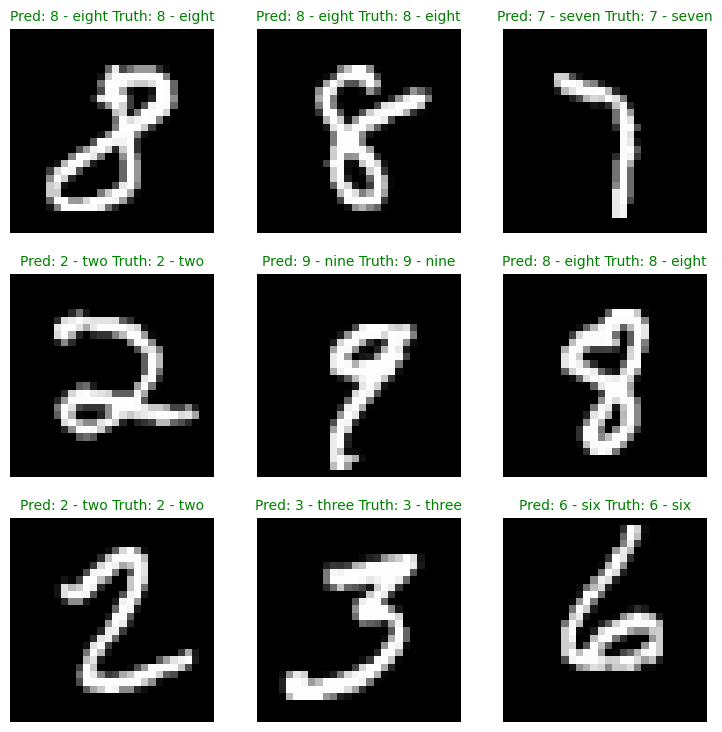

In [17]:
plt.figure(figsize=(9,9))
rows,cols = 3,3
for i,sample in enumerate(test_samples):
    plt.subplot(rows,cols,i+1)
    plt.imshow(sample.squeeze(),cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} Truth: {truth_label}"
    if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False)

In [18]:
y_preds = []
model.eval()
with torch.inference_mode():
    for X,y in test_loader:
        X,y = X.to(device),y.to(device)
        y_logit = model(X)
        y_pred = torch.softmax(y_logit,dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())
y_preds_tensor = torch.cat(y_preds)

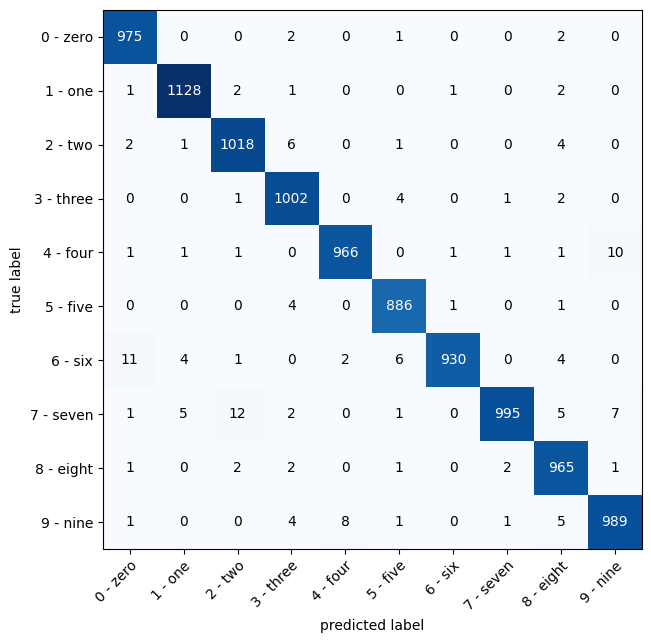

In [19]:
import torchmetrics 
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor,target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

In [20]:
torch.save(model,'./ModelFiles/model.pt')

In [21]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total no of learnable parameter: {total_params}")

Total no of learnable parameter: 149798


4. Modify CNN of Qn. 3 to reduce the number of parameters in the network. 
Draw a plot of percentage drop in parameters vs accuracy.

100%|██████████| 9912422/9912422 [00:05<00:00, 1699696.27it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 911434.29it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Original Model - Epoch [1/5], Step [100/600], Loss: 0.6329
Original Model - Epoch [1/5], Step [200/600], Loss: 0.2776
Original Model - Epoch [1/5], Step [300/600], Loss: 0.2347
Original Model - Epoch [1/5], Step [400/600], Loss: 0.1215
Original Model - Epoch [1/5], Step [500/600], Loss: 0.0928
Original Model - Epoch [1/5], Step [600/600], Loss: 0.1301
Original Model - Epoch [2/5], Step [100/600], Loss: 0.3557
Original Model - Epoch [2/5], Step [200/600], Loss: 0.0615
Original Model - Epoch [2/5], Step [300/600], Loss: 0.0331
Original Model - Epoch [2/5], Step [400/600], Loss: 0.0208
Original Model - Epoch [2/5], Step [500/600], Loss: 0.0705
Original Model - Epoch [2/5], Step [600/600], Loss: 0.1216
Original Model - Epoch [3/5], Step [100/600], Loss: 0.0502
Original Model - Epoch [3/5], Step [200/600], Loss: 0.0634
Original Model - Epoch [3/5], Step [300/600], Loss: 0.1158
Original Model - Epoch [3/5], Step [400/

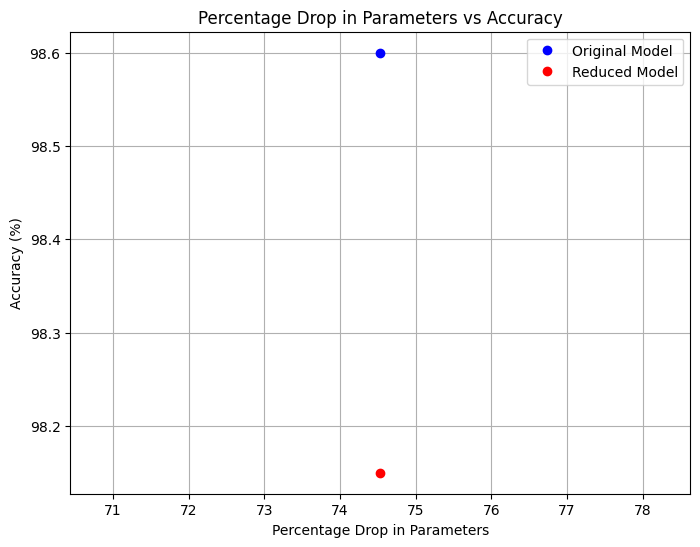

In [25]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the original CNN classifier
class OriginalCNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3),  
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(64, 128, kernel_size=3),  
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(128, 64, kernel_size=3),  
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )

        self.clf_head = nn.Sequential(nn.Linear(64, 20), 
                                      nn.ReLU(),
                                      nn.Linear(20, 10))

    def forward(self, x):
        features = self.net(x)
        return self.clf_head(features.view(x.size(0), -1))

# Define the reduced CNN classifier
class ReducedCNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),  
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(32, 64, kernel_size=3),  
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(64, 32, kernel_size=3),  
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )

        self.clf_head = nn.Sequential(nn.Linear(32, 20), 
                                      nn.ReLU(),
                                      nn.Linear(20, 10))

    def forward(self, x):
        features = self.net(x)
        return self.clf_head(features.view(x.size(0), -1))

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize original and reduced models
original_model = OriginalCNNClassifier()
reduced_model = ReducedCNNClassifier()

# Train original model
original_criterion = nn.CrossEntropyLoss()
original_optimizer = torch.optim.Adam(original_model.parameters(), lr=0.001)

num_epochs = 5
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = original_model(images)
        loss = original_criterion(outputs, labels)
        original_optimizer.zero_grad()
        loss.backward()
        original_optimizer.step()

        if (i + 1) % 100 == 0:
            print('Original Model - Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

# Train reduced model
reduced_criterion = nn.CrossEntropyLoss()
reduced_optimizer = torch.optim.Adam(reduced_model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = reduced_model(images)
        loss = reduced_criterion(outputs, labels)
        reduced_optimizer.zero_grad()
        loss.backward()
        reduced_optimizer.step()

        if (i + 1) % 100 == 0:
            print('Reduced Model - Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

# Evaluate original model
with torch.no_grad():
    original_correct = 0
    original_total = 0
    for images, labels in test_loader:
        outputs = original_model(images)
        _, predicted = torch.max(outputs.data, 1)
        original_total += labels.size(0)
        original_correct += (predicted == labels).sum().item()

original_accuracy = 100 * original_correct / original_total
print('Original Model - Test Accuracy: {:.2f} %'.format(original_accuracy))

# Evaluate reduced model
with torch.no_grad():
    reduced_correct = 0
    reduced_total = 0
    for images, labels in test_loader:
        outputs = reduced_model(images)
        _, predicted = torch.max(outputs.data, 1)
        reduced_total += labels.size(0)
        reduced_correct += (predicted == labels).sum().item()

reduced_accuracy = 100 * reduced_correct / reduced_total
print('Reduced Model - Test Accuracy: {:.2f} %'.format(reduced_accuracy))

# Plotting
params_original = sum(p.numel() for p in original_model.parameters() if p.requires_grad)
params_reduced = sum(p.numel() for p in reduced_model.parameters() if p.requires_grad)
percentage_drop = ((params_original - params_reduced) / params_original) * 100

plt.figure(figsize=(8, 6))
plt.plot([percentage_drop], [original_accuracy], 'bo', label='Original Model')
plt.plot([percentage_drop], [reduced_accuracy], 'ro', label='Reduced Model')
plt.xlabel('Percentage Drop in Parameters')
plt.ylabel('Accuracy (%)')
plt.title('Percentage Drop in Parameters vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()
